   Maturity (Years)  Yield (%)
0               0.5        1.5
1               1.0        1.7
2               2.0        1.9
3               3.0        2.1
4               5.0        2.3
5               7.0        2.5
6              10.0        2.8
7              20.0        3.0
8              30.0        3.2


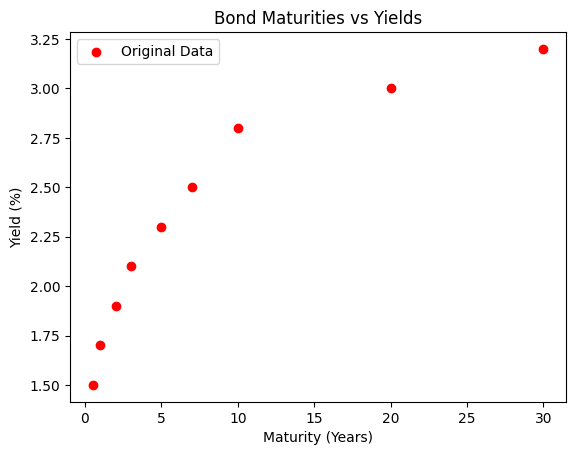

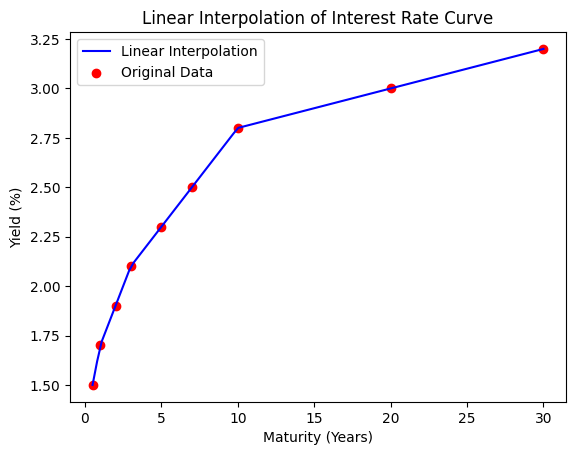

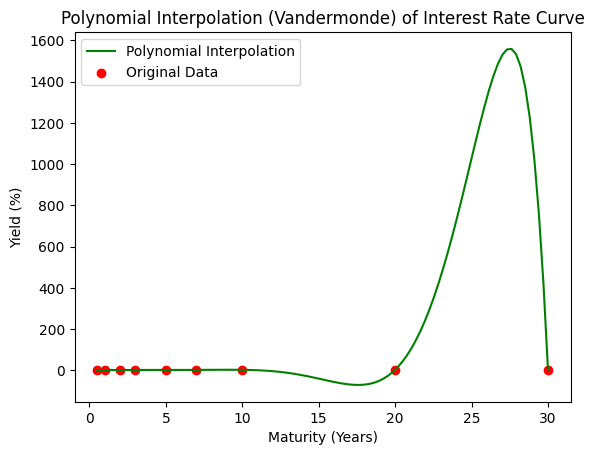

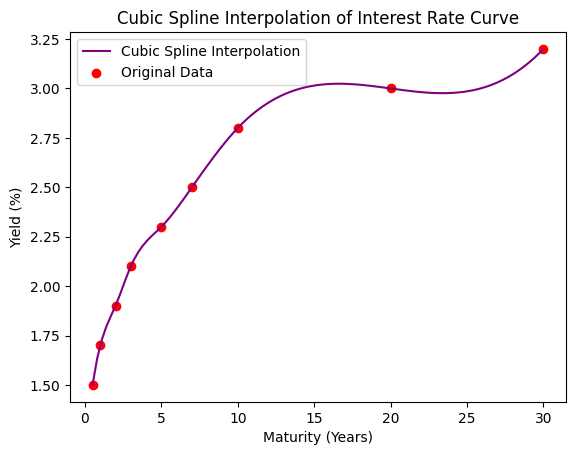

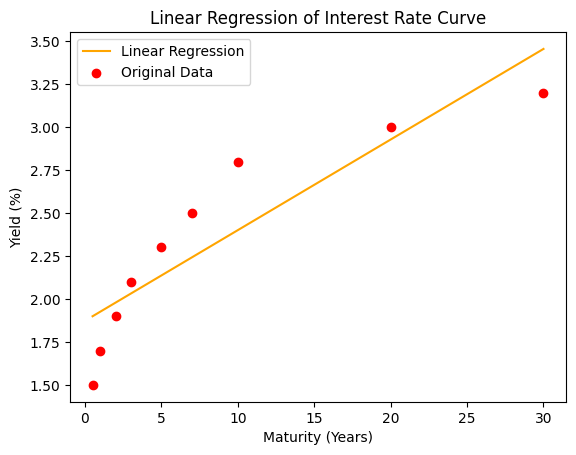

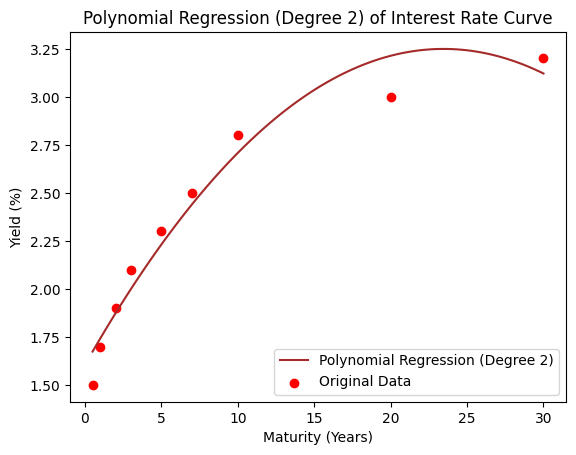

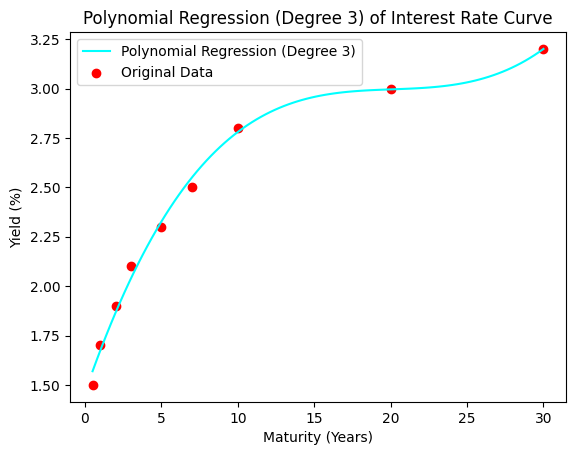

Linear Regression MSE: 0.06050020741150443
Polynomial Regression (Degree 2) MSE: 0.01241310303072965
Polynomial Regression (Degree 3) MSE: 0.0015889251702952795


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from numpy.polynomial import Polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 1. Synthetic data for bond maturities (years) and yields (%)
maturities = np.array([0.5, 1, 2, 3, 5, 7, 10, 20, 30])  # Maturity in years
yields = np.array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.0, 3.2])  # Yields in percentage

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Maturity (Years)': maturities,
    'Yield (%)': yields
})

# Display the data
print(df)

# Plot the raw data
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Bond Maturities vs Yields')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# 2. Interpolation Methods

# A. Linear Interpolation
linear_interp = interp1d(maturities, yields, kind='linear')

# Generate new maturities for interpolation
new_maturities = np.linspace(min(maturities), max(maturities), 100)
linear_yields = linear_interp(new_maturities)

# Plot Linear Interpolation
plt.plot(new_maturities, linear_yields, label='Linear Interpolation', color='blue')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Linear Interpolation of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# B. Polynomial Interpolation (Vandermonde Method)
coefficients = np.polyfit(maturities, yields, deg=len(maturities)-1)
poly_vandermonde = np.poly1d(coefficients)

# Generate yields from polynomial interpolation
poly_yields = poly_vandermonde(new_maturities)

# Plot Polynomial Interpolation (Vandermonde)
plt.plot(new_maturities, poly_yields, label='Polynomial Interpolation', color='green')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Polynomial Interpolation (Vandermonde) of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# C. Cubic Spline Interpolation
cubic_spline_interp = CubicSpline(maturities, yields)
cubic_spline_yields = cubic_spline_interp(new_maturities)

# Plot Cubic Spline Interpolation
plt.plot(new_maturities, cubic_spline_yields, label='Cubic Spline Interpolation', color='purple')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Cubic Spline Interpolation of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# 3. Regression Techniques

# A. Linear Regression
# Reshape data for sklearn
X = maturities.reshape(-1, 1)
y = yields

# Initialize linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Predict yields using linear regression
linear_yields_reg = linear_reg.predict(new_maturities.reshape(-1, 1))

# Plot Linear Regression
plt.plot(new_maturities, linear_yields_reg, label='Linear Regression', color='orange')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Linear Regression of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# B. Polynomial Regression (Degree 2)
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

# Train Polynomial Regression Model
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly_2, y)

# Predict using Polynomial Regression (Degree 2)
new_maturities_poly_2 = poly_features_2.fit_transform(new_maturities.reshape(-1, 1))
poly_yields_2 = poly_reg_2.predict(new_maturities_poly_2)

# Plot Polynomial Regression (Degree 2)
plt.plot(new_maturities, poly_yields_2, label='Polynomial Regression (Degree 2)', color='brown')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Polynomial Regression (Degree 2) of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# C. Polynomial Regression (Degree 3)
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)

# Train Polynomial Regression Model
poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_poly_3, y)

# Predict using Polynomial Regression (Degree 3)
new_maturities_poly_3 = poly_features_3.fit_transform(new_maturities.reshape(-1, 1))
poly_yields_3 = poly_reg_3.predict(new_maturities_poly_3)

# Plot Polynomial Regression (Degree 3)
plt.plot(new_maturities, poly_yields_3, label='Polynomial Regression (Degree 3)', color='cyan')
plt.scatter(maturities, yields, color='red', label='Original Data')
plt.title('Polynomial Regression (Degree 3) of Interest Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# 4. Evaluate the Models using Mean Squared Error (MSE)
print(f"Linear Regression MSE: {mean_squared_error(y, linear_reg.predict(X))}")
print(f"Polynomial Regression (Degree 2) MSE: {mean_squared_error(y, poly_reg_2.predict(X_poly_2))}")
print(f"Polynomial Regression (Degree 3) MSE: {mean_squared_error(y, poly_reg_3.predict(X_poly_3))}")
